### Главная задача
Определить закономерности определяющие успешность игры для компании на 2017 год


### Второстепенные задачи
   

1. Исследовательский анализ

   * Количество выпускаемых игр по годам
   * Определение популярных платформа и их срок существования
   * Определить актуальны период для построения прогноза на 2017 год
   * Выбрать потенциально прибыльных платформ
   * Анализ глобальных продаж игр в разбивке по платформам (boxplot)  
   * Оценка влияния продаж внутри одной платфоормы. 
   * Оценка влияния отзывов пользователй и критиков.
   * Соотношение результата с продажами на других платформах
   * Анализ общего распределения игр по жанрам.
   * Вывод
   
   
2. Портрет пользователй в регионах
   
   * Самые популярные платформы
   * Самые популярные жанры
   * Влияние рейтинга на продажу
   

3. Проверка гипотез
  * Гипотеза №1
      * Средние пользовательские рейтинги платформ Xbox One и PC равны.*
  * Гипотеза №2
      * Средние пользовательские рейтинги жанров Action и Sports  разные*
   

Общий вывод  
    

>**_<span style="color:green">Оглавление в тетрадках jupyter notebook — отличная практика. Так держать! :) </span>_**


<a id="#analize"></a>
### 1.Общая информация о данных 

Библиотеки

In [1]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Первичный осмотр данных

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/game/games.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.shape

(16715, 11)

In [6]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Уникальные значения платформ и выпуска 

In [8]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Анализ временного диапазона 

In [9]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
print('Временной диапозон данных с {} года по {}'.format(df['Year_of_Release'].min(),df['Year_of_Release'].max()))

Временной диапозон данных с 1980.0 года по 2016.0


<a id="analize_result"></a>
### Вывод
Всего строк 16715, временной диапозон с 1980 года по 2016

Типы данных

* Year_of_Release    Так как указан только год, достаточно привести к целочисленному значнию.
* User_Score         Привести к типу Float

Значения с пропусками Пропуски 
* **Genre и Name**       Есть.
* **Critic_Score**       Больше половины данных с пропусками
* **User_Score**         Помимо пустых ячее, есть значение tbd означающие неопределенность. В нашем случае это сопоставимо с пропуском
* **Rating**             Пропусков больше половины, нужно разобраться с рейтинговыми показателями и категоризировать.
* **Year_of_Release**    есть пропуски


Стоит обратить внимание что одна игра может выпускаться для нескольких платформ.


<a id="prepare"> </a>
### 2.Подгтовка данных 


### Обработка пропусков
<a id='2.2'></a>

Основная маccа пропусков находится в столбцах оценки пользователей, критиков и рейтинга.
Заполнить их средним или медианой, будет не верным решением. Cлишком изменчивая величина.
Пока не выбран актуальный год, для построения оценки, пропуски оставим, при выборе актуального года, для оценки будем ориентироваться  кол-во пропусков.
Плюс, можно будет определить влияние оценок пользователей, критиков и рейтинга  или их отсутствие на продажи игр.


*Приведем к нижнему регистру название столбцов*

In [12]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [13]:
df = df.dropna(subset=['name','genre','year_of_release']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных встречается аббревиатура tbd сокращение означающие неопределнность. в нашем сл учае это равносильно отсутсвтию оценки.*удалим часть пропусков*

In [14]:
#Посмотрим значения оценок пользователей
df.user_score.sort_values().unique()
# Временно заменим его на NaN
df.user_score = df.user_score.replace('tbd')

### Преобразование типов 
<a id='2.1'></a>

*year_of_release приведем к целочисленному типу.*

In [15]:
df.year_of_release=df.year_of_release.astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       8610 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


*Посмотрим уникальность значений в столбцах*

In [16]:
df.user_score = df.user_score.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       8610 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


*Категоризируем данные рейтинга*

In [17]:
# Уникальные значения
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
# удаление значения RP - рейтинг ожидается
df.rating=df.rating.replace('RP')

In [19]:
esrb_cat_columns = df.loc[df.rating.notna(),]['rating'].unique().tolist()

значения приведем в соответсвии с Российской классификацией информационной продукцией

In [20]:
rars_cat_data = ['0+','18+','12+','10+','0+','18+','3+']

#Russian Age Rating System
russian_age_rating=pd.DataFrame.from_dict({'rating':esrb_cat_columns,'rars_rating':rars_cat_data})

In [21]:
russian_age_rating

,rating,rars_rating
0,E,0+
1,M,18+
2,T,12+
3,E10+,10+
4,K-A,0+
5,AO,18+
6,EC,3+


In [22]:
df = df.merge(russian_age_rating,how='left',on='rating')

In [23]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rars_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,0+
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,0+
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,0+
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


<a id='2.3'></a>
### Подсчет сумарных продаж по всем регионам

*посчитаем суммарные продажи*

In [24]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Вывод


Характер пропусков в значениях **critic_score user_score** "неслучайные", были оставлены без изменений. Предпологается, что эти пропуски  следтвие как не желания пользователй ставить оценку игре, так и отсутсвие технических систем для оценок.

В поле рейтинг так же есть пропуски, которые вероятно связаны с различием в законадательстве стран и обязательством производителей проходить процедуру присваивания рейтинга.

Данные обработаны и готовы для дальнейше работы.

### 3.Исследовательский анализ данных 
<a id='3'></a>


<a id='3.1'></a>
### Количество выпускаемых игр по годам

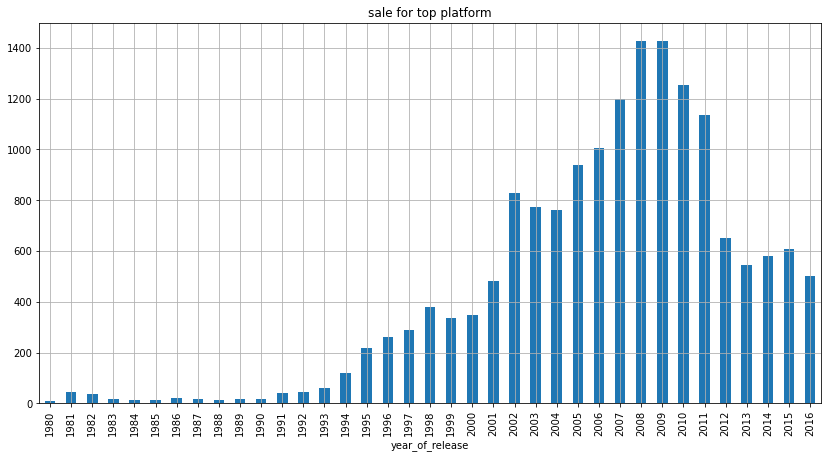

In [25]:
(df.sort_values('year_of_release',ascending=True).groupby('year_of_release')['name'].count()
                                                 .plot(kind='bar',grid='true',title='sale for top platform',figsize=(14,7)))

**Вывод**

*больше всего игр было выпущено в 2008 и 2009 годах, затем кол-во выпускаемых  игр пошло на спад, с 2015 года выпуск игр держится между 500 и 600*

<a id='3.2'> </a>


### Определение популярных платформа и их срок существования

In [26]:
# Выделим топ 5 платформ по общей сумме продаж
top_sales_platform = df.groupby('platform')['all_sales'].agg('sum').sort_values(ascending=False).head(5)

In [27]:
top_sales_platform

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: all_sales, dtype: float64

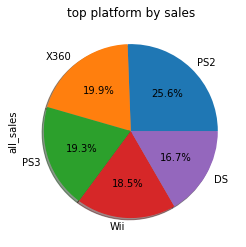

In [28]:
top_sales_platform.plot(kind="pie", autopct='%1.1f%%',shadow=True, title='top platform by sales')

Text(0, 0.5, 'sum of sales')

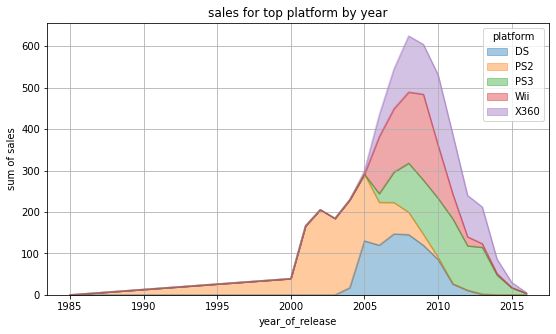

In [29]:
#график продаж для топ платформ по годам
top_sales_platform

(df
 .query('platform in @top_sales_platform.index')
 .pivot_table(index='year_of_release',columns='platform',values='all_sales',aggfunc='sum')
 .plot(kind='area',figsize=(9,5),grid="True",alpha=0.4,title='sales for top platform by year')
).set_ylabel('sum of sales')

*Определим годы релизов платформ, первый и последний*

In [30]:
#Выделим первые года игровых релизов, и будем считать это годом выхода платформы.
platform_release =(df.sort_values('year_of_release')
                   .groupby('platform')
                   .agg({'year_of_release':'first'})).reset_index().groupby('year_of_release').agg('count').reset_index()

friquency_platform = (platform_release.year_of_release.max()-platform_release.year_of_release.min())/len(platform_release.year_of_release)


In [31]:
platform_release

,year_of_release,platform
0,1980,1
1,1983,1
2,1985,2
3,1988,1
4,1990,2
5,1992,1
6,1993,2
7,1994,3
8,1995,1
9,1996,2


In [32]:
#выборка по первому и последнему годам релизов платформ.
platform_lives = (df.sort_values('year_of_release')
                  .groupby('platform')
                  .agg({'year_of_release':['first','last']})
)
# жизненый цикл каждой платформы
platform_lives['life_cycle'] = platform_lives.year_of_release['last'] - platform_lives.year_of_release['first']

In [33]:
platform_lives

year_of_release       life_cycle
                   first  last           
platform                                 
2600                1980  1989          9
3DO                 1994  1995          1
3DS                 2011  2016          5
DC                  1998  2008         10
DS                  1985  2013         28
GB                  1988  2001         13
GBA                 2000  2007          7
GC                  2001  2007          6
GEN                 1990  1994          4
GG                  1992  1992          0
N64                 1996  2002          6
NES                 1983  1994         11
NG                  1993  1996          3
PC                  1985  2016         31
PCFX                1996  1996          0
PS                  1994  2003          9
PS2                 2000  2011         11
PS3                 2006  2016         10
PS4                 2013  2016          3
PSP                 2004  2015         11
PSV                 2011  2016          5
SAT                 1994  1999          5
SCD                 1993  1994          1
SNES                1990  1999          9
TG16                1995  1995          0
WS                  1999  2001          2
Wii                 2006  2016         10
WiiU                2012  2016          4
X360                2005  2016         11
XB                  2000  2008          8
XOne                2013  2016          3

In [34]:
# функция для вывода 
def piriod_output(x):
    x_year = int(x)
    if int(x) >10:
        print('пока только до 10-ти')
    x_month = int((x-x_year)*12)

    print (x_year, x_month)

In [35]:
piriod_output(friquency_platform)

1 7


In [36]:
piriod_output(platform_lives.life_cycle.mean())

7 7


Средний перерыв между выходом новой игровой платформы составляет:
1 Год 7 Месяцев

Средний жизненый цикл игровой платформы составляет:
7 Лет 7 Месяцев


<a id='3.3'></a>
### Актуальный период для дальнейшего анализа

*Для определения актуального периода, воспользуемся полученными ранее данными касательно последнего релиза.* 

In [37]:
actual_platform = platform_lives.loc[(platform_lives.year_of_release['last']>2015)]
actual_platform.sort_values('life_cycle')

year_of_release       life_cycle
                   first  last           
platform                                 
PS4                 2013  2016          3
XOne                2013  2016          3
WiiU                2012  2016          4
3DS                 2011  2016          5
PSV                 2011  2016          5
PS3                 2006  2016         10
Wii                 2006  2016         10
X360                2005  2016         11
PC                  1985  2016         31

In [38]:
data = df.query('platform in @actual_platform.index').reset_index(drop=True)

In [39]:
data_sale_platform=data.groupby(['year_of_release','platform'])[['platform','all_sales']].agg('sum').reset_index()

In [40]:
data_sale_platform

,year_of_release,platform,all_sales
0,1985,PC,0.04
1,1988,PC,0.03
2,1992,PC,3.03
3,1994,PC,12.87
4,1995,PC,4.22
...,...,...,...
80,2016,PSV,4.25
81,2016,Wii,0.18
82,2016,WiiU,4.60
83,2016,X360,1.52


график продаж по актуальным платформам

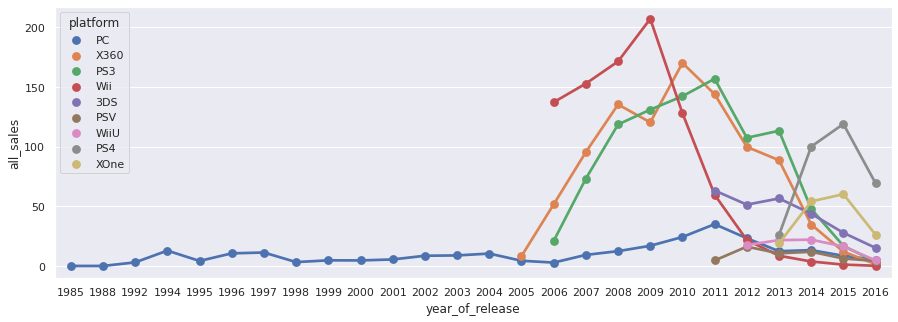

In [41]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(
    data=data_sale_platform, x="year_of_release", y="all_sales", hue="platform")

*На текущий момент роста продаж нет ни у одной платформы, по сумме продаж выше всех находятся новые платформы PS4 затем Xone*

На основе полученных данных, PS4 на текущий момент наиболее популярная платформа.


<a id='3.5'></a>
### Анализ глобальных продаж игр в разбивке по платформам

*Большой разброс по суммарным продажам на всех платформах, вероятнее всего  это указывает на  достаточное количество малопродаваемых игр.
А выбросы в нашем случае - это самые продаваемые игры успехпеременчив*

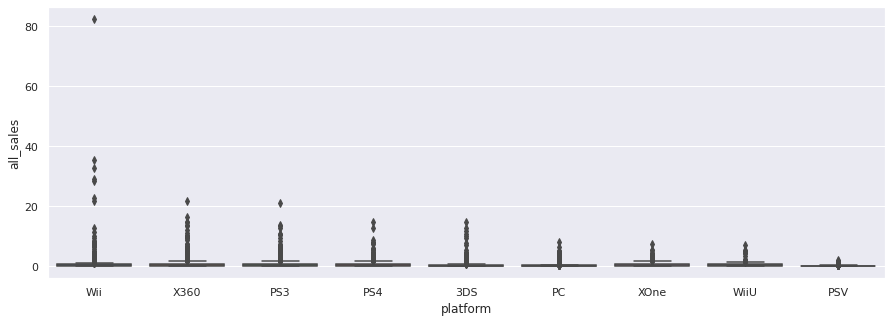

In [42]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=data, x='platform', y='all_sales')

<a id='3.6'></a> 
### Оценка влияния продаж внутри одной платфоормы. Оценка влияния отзывов пользователй и критиков.



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


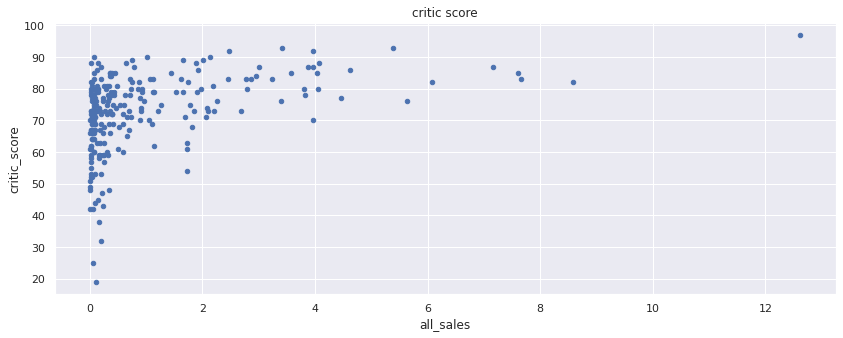

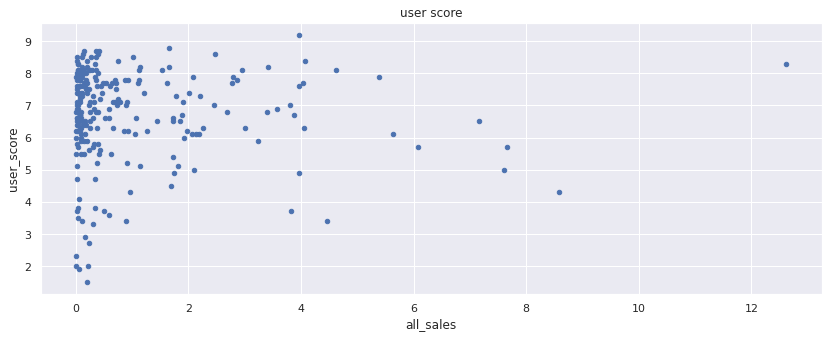

In [43]:

df_ps4 = data.query('platform=="PS4"').dropna()

(df_ps4[['all_sales','critic_score']]
 .plot(x='all_sales',y='critic_score',kind='scatter',title='critic score',grid='True',figsize=(14,5)) 
)
(df_ps4[['all_sales','user_score']]
 .plot(x='all_sales',y='user_score',kind='scatter',title='user score',figsize=(14,5))
)

Влияние оценок пользователей и критиков на продажи для самой популярной платформы PS4



In [44]:
print(df_ps4['critic_score'].corr(df_ps4['all_sales']))

0.40388522217143397


In [45]:
print(df_ps4['user_score'].corr(df_ps4['all_sales']))

-0.02586143128172812


*Посмотрим как влияют оценки критиков и пользователй в регионах*

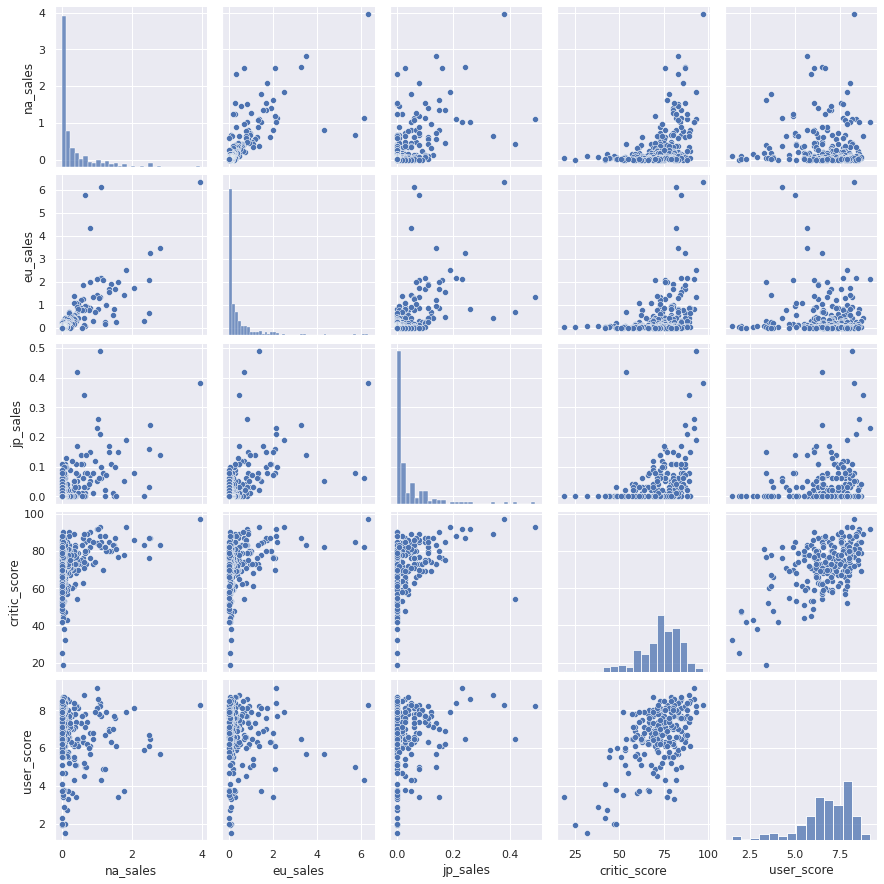

In [46]:
sns.pairplot(df_ps4[['na_sales','eu_sales','jp_sales','critic_score','user_score']]) 

<a id='3.7'></a>
### Соотношение результата с продажами на других платформах.Оценка влияния отзывов пользователй и критиков.

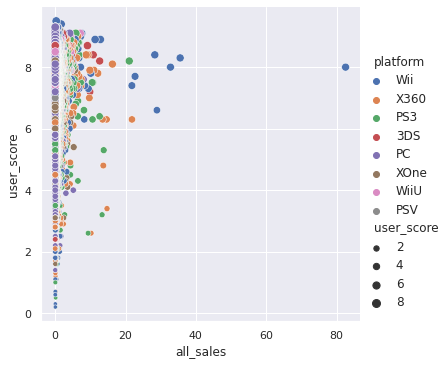

In [47]:
# Влияние оценки пользователя
sns.relplot(y='user_score',x='all_sales'
            ,data=data.query('platform!="PS4"')
            ,hue='platform',size='user_score')


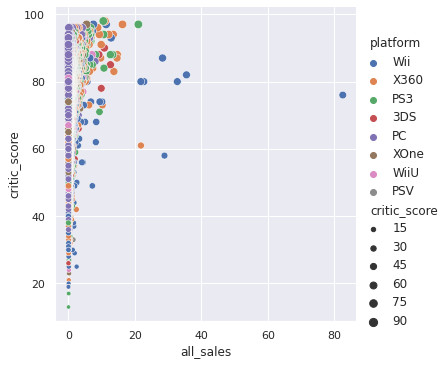

In [48]:
# Влияние оценки критиков
sns.relplot(y='critic_score',x='all_sales'
            ,data=data.query('platform!="PS4"')
            ,hue='platform',size='critic_score'
           )



### *Вывод*

Прямой зависимоти прожад от  оценки критиков или пользователей нет.  
Большое количество игр, которые были высоко оценены как пользователями так и критиками имеют низкие продажи, внезависимости от региона или платформы. 


<a id='3.8'></a>
### Анализ общего распределения игр по жанрам.


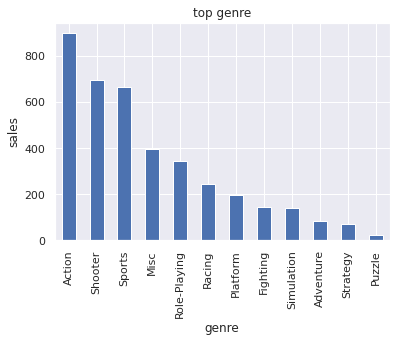

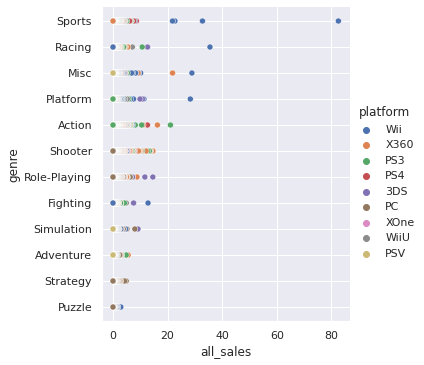

In [49]:
fig, ax = plt.subplots()
ax=(data
 .groupby('genre')['all_sales']
 .agg('sum')
 .sort_values(ascending=False)
 .plot.bar()
)

ax.set_ylabel('sales')
ax.set_title('top genre')
plt.show()

sns.relplot(data=data,x="all_sales",y="genre",hue="platform")


*Самые популярные жанры это шутер акшен  спорт и ролевые игры, спорт и снова набирающий популярность жанр Platform.* 


<div class="alert alert-info" role="alert">
Попробовал построить боксплоты, не смог уместить красиво. Но на данном нрафике то же вилны выбросы. Как ты и говорил есть бестселлеры. В жанре спорт особенно.
</a>    

<a id='3.9'></a>
### *Вывод*

В результате исследовательского анализа был выявлен актулальный период для построения дльнейшего прогноза.
Были определеные следующие параметры:

1.Года в которые продавалось больше всего игр:

**2008, 2009**

2.Больше всего игр продается для следующих платформ

**PS2**

**X360**

**PS3**

**Wii**

**DS**

3.Срок за котрый появляются новые платформы

**около 2-х лет**

4.Срок в течении которого платформа "живет"

**около 8 лет**, есть частные случаю, напрмиер PS2 была на рынке платформ в течении 12 лет
 
Так же была проведен анализ степени влияния оценки пользователй и критиков на продажу игр. 

Прямого влияния не выявлено. Невысокие продажи наблюдались даже у игр с высокими оценками критиков и пользователей. Проверить воздействие на продажу наличие оценки как таковой, по текущим данным нельзя.

Вероятнее всего прямое влияние оказывают другие факторы (предидущие выпуски игр, реклама)




<a id='4'></a>
## 4 Портрет пользователя каждого региона

In [50]:
# определим регионы
region = ['na_sales','eu_sales','jp_sales']


<a id ='4.1'></a>
### 4.1 Самые популярные платформы по регионам

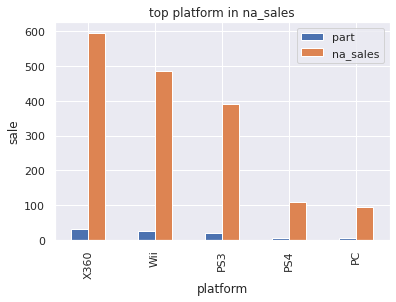

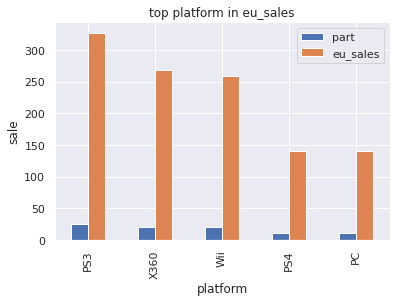

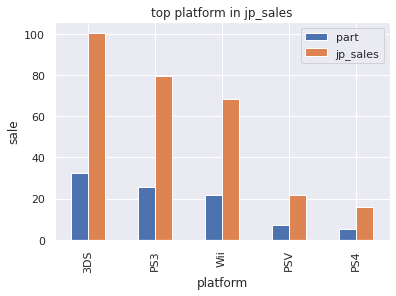

In [51]:
#
for i in region:
    # определим пременную с суммой всех продаж по региону
    sum_sales = data[i].sum()
    # Добавим к временному фрейму доли продаж каждой платформы в процентах
    data['part'] = (data[i]/sum_sales)*100
    # нарисуем график
    ax =(data[['platform','part',i]]
     .groupby('platform')
     .agg('sum')
     .sort_values(i,ascending=False).head(5)
     .plot.bar(title='top platform in '+i)
    )
    ax.set_ylabel('sale')

#### Вывод


На первых местах во всех регионах, в топ платформы, попали платформы, которые дольше всего присутсвуют на рынке.

Спрос Северо Американски и Европейских сгроков похож, отличия есть только в занимаемых позициях, но сами платформы идентичны. Доли продаж разделены по платформам практически поровну среди первых трех.

У Японских игроков первое место занимает 3DS и нет игроков, которые отдавали бы предпочтение Xbox платформе. 2 из 5 платформ, портативные этот факт обязательно стоит принять к сведению.

<a id='4.2'></a>
### 4.2 Самые популярные жанры (топ-5)

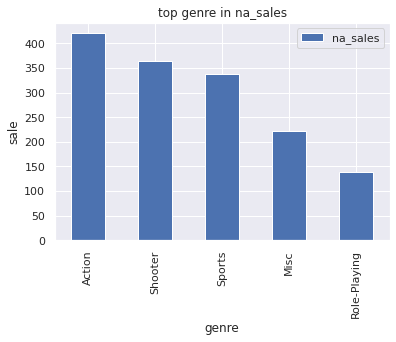

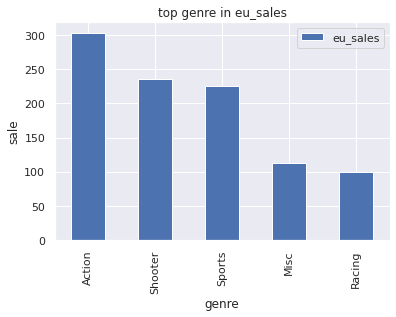

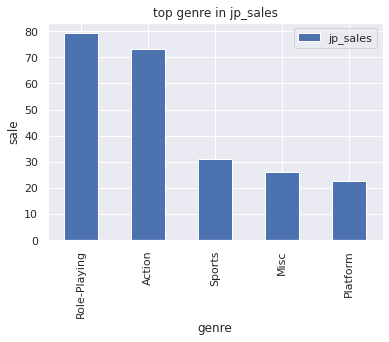

In [52]:
for i in region:
    ax =(data[['genre',i]]
     .groupby('genre')
     .sum()
     .sort_values(i,ascending=False)
     .head(5)
     .plot.bar(title='top genre in '+i)
    )
    ax.set_ylabel('sale')

#### Вывод
Здесь как и с популярностью платформ, Севверная Америка и Европа распределили места практически идентично

А вот Японские пользователи в отличии от вышеописанных игроков больше всего любят играть в ролевые игры и меньше интересуются raicing и shooter жанрами. 
В остальном вкусы схожи.

<a id='4.3'></a>
### Влияние ли рейтинга ESRB на продажу

In [53]:
#Удалим "NaN" в столбце рейтинга
data=df.dropna(subset=['rars_rating'])

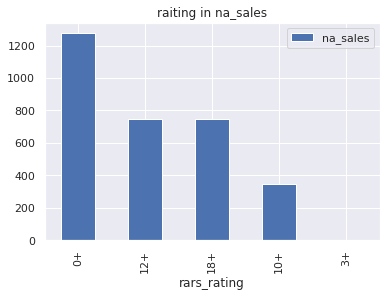

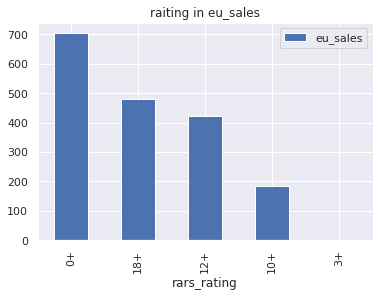

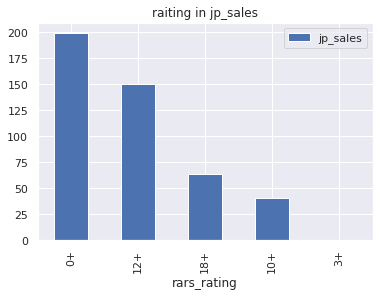

In [54]:
for i in region:
    sx=(data[['rars_rating',i]]
     .groupby('rars_rating')
     .sum()
     .sort_values(i,ascending=False)
     .head(10)
     .plot.bar(title='raiting in '+i)
    )
    ax.set_title('sale')

Рейтинг.
Снова похожая картина, Северная Америка и Европа определили на второе место игры для взрослых, а я пония для подростков.

## 5 Проверка гипотез

<a id='g1'> </a>
### Гипотеза №1


Сформулируем нулевую и альтернативную гипотезы

**Нулевая:** Разница между между средним значением пользовательских рейтингов среди платформ Xbox One и PC равна 0 

**Альтернативная:** Разница между между средним значением пользовательских рейтингов среди платформ Xbox One и PC не равна  0 

In [55]:
df=df.dropna(subset=['user_score'])

alpha = .05
xone_user_score=df.loc[df.platform=='XOne',['user_score']]

pc_user_score=df.loc[df.platform=='PC',['user_score']]
print(len(xone_user_score))

print('Среднее значение для xone',xone_user_score.mean())
print('Стандартное отклонение для xone', np.std(xone_user_score))

print('Среднее значение  для PC',pc_user_score.mean())
print('Стандартное отклонение для PC', np.std(pc_user_score))




185
Среднее значение для xone user_score    6.524865
dtype: float64
Стандартное отклонение для xone user_score    1.369209
dtype: float64
Среднее значение  для PC user_score    7.063708
dtype: float64
Стандартное отклонение для PC user_score    1.526285
dtype: float64


Согласно нашей нулевой гипотезы, среднее генеральной совкупности выборки xone user_score = 7.06.


Посмотрим насколько это вероятно

In [56]:
results = st.ttest_ind(
    xone_user_score, 
    pc_user_score,equal_var=False)

print('p-значение: {:.9f}'.format(results.pvalue[0]))

p-значение: 0.000004248


In [57]:
print(results)

Ttest_indResult(statistic=array([-4.68400886]), pvalue=array([4.24814081e-06]))


In [58]:

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Отвергаем нулевую гипотезу


<a id='g2'> </a>
### Гипотеза №2

Сформулируем нулевую и альтернативную гипотезы

**Нулевая:** Средние значения пользовательских рейтингов среди жанра Action и Sports равны

**Альтернативная:** Разница между между средним значением пользовательских рейтингов среди жанра Action и Sports не равна 0

In [59]:
action_user_score = df.loc[df.genre=='Action',['user_score']]

sport_user_score = df.loc[df.genre=='Sports',['user_score']]

print('Среднее значение выборки для Action',action_user_score.mean())
print('Стандартное отклонение для Action', np.std(action_user_score))

print('Среднее значение выборки для Sports',sport_user_score.mean())
print('Стандартное отклонение для Sports', np.std(sport_user_score))


Среднее значение выборки для Action user_score    7.052849
dtype: float64
Стандартное отклонение для Action user_score    1.432749
dtype: float64
Среднее значение выборки для Sports user_score    6.947549
dtype: float64
Стандартное отклонение для Sports user_score    1.611859
dtype: float64


Согласно нашей нулевой гипотезы, среднее генеральной совкупности  Action user_score = 7.06.


In [60]:
results = st.ttest_ind(
    action_user_score, 
    sport_user_score,equal_var=False)

print('p-значение: {:.9f}'.format(results.pvalue[0]))

p-значение: 0.057044963


In [61]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Не получилось отвергнуть нулевую гипотезу


<a id='end'> </a>
## Общий вывод


Для построения прогноза был отобран период в 5 лет с 2011 года по 2016
Критерием отбора послужили два фактора:

1. Жизненный цикл платформы, который составляет около 7 лет

2. Дата последнего релиза игры для  платформы была в 2016 году.




На основе этих данных были определены следующие факторы влияющие на продажу игр. Далее по списку начиная с самого влиятельного.

**Регион**

Анализ показал что интересы игроков отличаются в зависимости от региона. Самое незначительное отличие между игроками Северной Америки и Европы, больше всего отличий в предпочтениях у Японских пользователей.

**Платформа**

Важнейший фактор, который очень сильно влияет на продажу игр. Для того что бы пользователь имел возможность опробовать игру, выпускать ее необходимо под новейшие платформы (PS2,X360,PS3,Wii,DS). Иначе несмотря ни на какие маркетинговые или рекламные компании игру не займет место в топ листе.

**Жанр**

При выборе жанра нужно опираться на регион и отличие в предпочтениях между Северо Американскими  и Японскими игроками.

**Рейтинг**

Лучше всего будет продаваться игра с рейтингом 0+, для всех. Если выпускается игра для детей 3+, то рассчитывать на высокие продажи не стоит.



**Оценки критиков и пользователей**

Степень влияния оценок критиков и пользователей прямо не влияет на продажи, возможно она вносит коррекцию в продажу, но для изучения этого нужны данные по продажам игр в течение года  и их оценками на протяжении года.
Тогда можно провести анализ на то, как влияет наличие оценки и её значение (негативная или позитивная)





